In [6]:
import os
from sound.sound_eval import eval_sound
import numpy as np
from matplotlib import pyplot as plt
import pydub
from time_series.anomaly_detection import polyreg_outliar_mse, lof
from time_series.smoothening_functions import power_smooth, llr_smooth, ewma_bias_corrected, kaiser_wind,derivative

In [9]:

folders = ["data/cust", "data/topsdata"]
data_rms = []
data_bin = []
# load "normal" data
def eval_linreg(arr, n, linreg):
    arr = np.array(arr).reshape((len(arr),))
    windows = []
    labels = []
    for i in range(len(arr)-n):
        windows.append(arr[i:i+n])
        labels.append(arr[i+n])
    return (linreg.predict(windows) - labels)**2
for dir in folders:
    for filename in os.listdir(dir):
        fil = os.path.join(dir, filename)
        print("getting", fil)
        a = pydub.AudioSegment.from_mp3(fil)
        
        y = np.array(a.get_array_of_samples())
        print(y.shape)
        data_binr, data_rmsr, _ = eval_sound(y,a)
        data_bin.append(data_binr)
        data_rms.append(data_rmsr)
        del a
        del y

linreg_rms = polyreg_outliar_mse(data_rms, 15)
linreg_bin = polyreg_outliar_mse(data_bin, 15)

getting data/cust\c1.mp3
(36240032,)
getting data/cust\c2.mp3
(65520000,)
getting data/cust\c3.mp3
(79440016,)
getting data/cust\c4.mp3
(69789168,)
getting data/cust\c5.mp3
(61149184,)
getting data/cust\c6.mp3
(6429168,)
getting data/topsdata\topson1.mp3
(35897400,)
getting data/topsdata\topson2.mp3
(38367000,)
getting data/topsdata\topson3.mp3
(44982000,)
getting data/topsdata\topson4.mp3
(57771000,)
getting data/topsdata\topson5.mp3
(50807100,)
getting data/topsdata\topson6.mp3
(5516400,)


In [10]:
def SWIDE(signal, err):
    anchor = 0
    diff_mean = 0
    segms = []
    
    i = 0
    while anchor < len(signal):
        i = anchor + 1
        diffs=[]
        diff_mean = 0
        while i < len(signal) and abs(signal[i] - signal[i-1]) - diff_mean <= err :
            
            diffs.append(abs(signal[i] - signal[i-1]))
            
            i+=1
            diff_mean = np.mean(np.array(diffs))
        segms.append([anchor,np.mean(np.array(signal[anchor:i])),i])
        anchor = i
    return segms





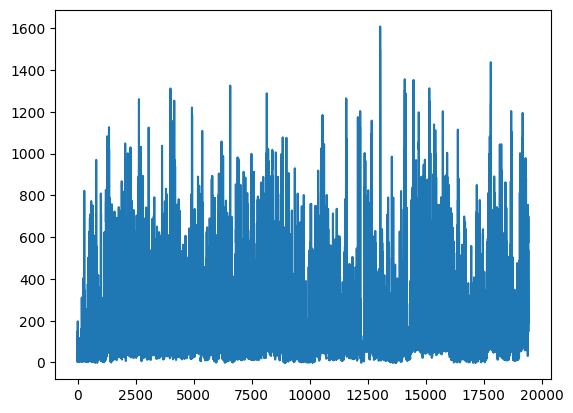

In [11]:
a = pydub.AudioSegment.from_mp3("data/custom_game.mp3")
        
y = np.array(a.get_array_of_samples())
data_binr, data_rmsr, _ = eval_sound(y,a)
plt.plot(data_binr)
plt.show()

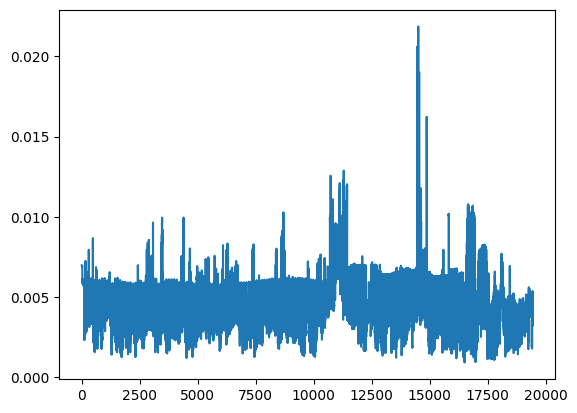

In [12]:
singl_frm = np.loadtxt("data/custom_game.csv", delimiter = ",")
plt.plot(singl_frm)
plt.show()

In [ ]:
from pyod.models.lunar import LUNAR
from time_series.smoothening_functions import power_smooth, llr_smooth, ewma_bias_corrected, kaiser_wind,derivative
cls_l = LUNAR(n_neighbours=180)
cls_l.fit(np.array(kaiser_wind(np.array(singl_frm), 60, 2)).reshape(-1, 1))
plt.plot(cls_l.decision_scores_)
plt.show()

: 

: 

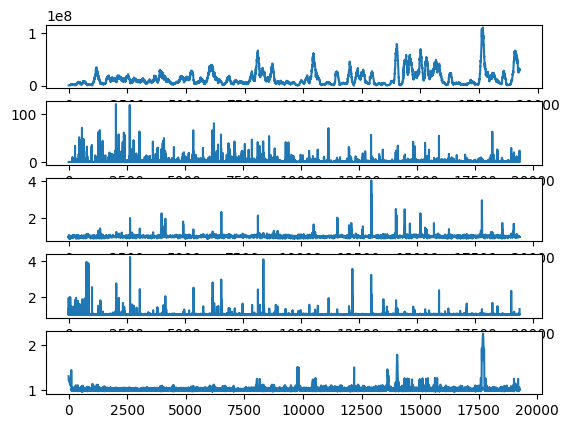

In [22]:
from time_series.smoothening_functions import power_smooth, llr_smooth, ewma_bias_corrected, kaiser_wind,derivative
fig, axs = plt.subplots(5)
    
axs[0].plot(eval_linreg(kaiser_wind(np.array(data_binr), 180, 2), 15, linreg_bin))
axs[1].plot(eval_linreg(data_rmsr, 15, linreg_rms))
axs[2].plot(lof(np.array(data_binr), 240))
axs[3].plot(lof(np.array(data_rmsr), 180))
axs[4].plot(lof(kaiser_wind(np.array(data_binr), 180, 2), 180))
plt.show()


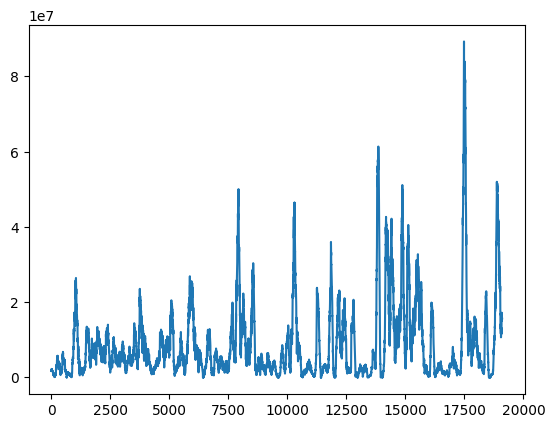

In [23]:
unsup_linreg = polyreg_outliar_mse([data_binr],150)
plt.plot(eval_linreg(kaiser_wind(np.array(data_binr), 180, 2), 150, unsup_linreg))

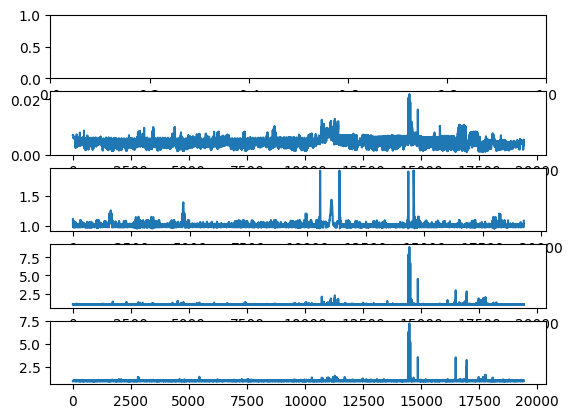

In [24]:
fig, axs = plt.subplots(5)
    
# axs[0].plot(eval_linreg(kaiser_wind(np.array(data_binr), 180, 2), 15, linreg_bin))
# axs[1].plot(eval_linreg(data_rmsr, 15, linreg_rms))
axs[1].plot(singl_frm)
axs[2].plot(lof( kaiser_wind(np.array(singl_frm), 180, 2), 180))
axs[3].plot(lof(np.array(singl_frm), 180))
axs[4].plot(lof(np.array(singl_frm), 45))
plt.show()

In [25]:
print(len(singl_frm[:-12]))
len(data_binr)

19422


19422

(19422, 3)
[ 3.78055556  1.25555556  6.625      14.26944444  6.40833333 13.06111111
  8.18333333 16.84166667  2.00555556 13.4         5.74166667  6.76944444]


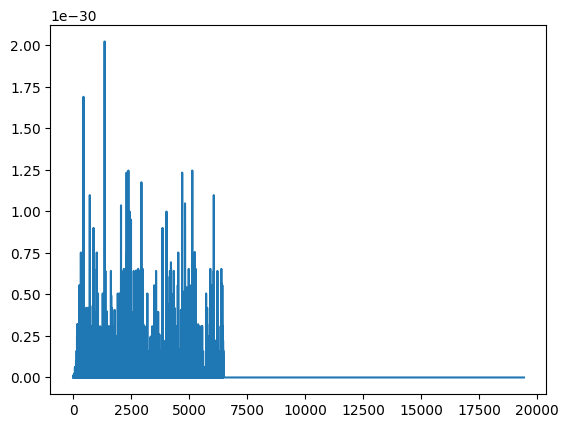

In [26]:
from time_series.anomaly_detection import pca_outliar
from sklearn.preprocessing import MinMaxScaler
from time_series.preprocessing import normalize_mean_cov
mnmx = MinMaxScaler(feature_range=(-1,1))
new_sig = np.array([data_binr, singl_frm[:-12], data_rmsr])
mnmx.fit(new_sig.reshape(-1,3))
signal = mnmx.transform(new_sig.reshape(-1,3))
# new_sig = np.array([normalize_mean_cov(data_binr) , normalize_mean_cov(data_binr), normalize_mean_cov(data_rmsr)])
# signal = new_sig.reshape(-1,3)
print(signal.shape)
res = pca_outliar(signal, 3)
print(res.argsort()[-12:][::-1]/(6*60))
plt.plot(res)

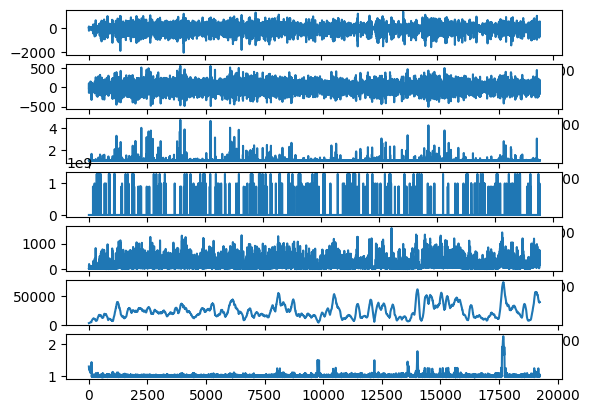

<Figure size 1800x1200 with 0 Axes>

In [27]:

fig, axs = plt.subplots(7)
plt.figure(figsize=(18,12))  
d_2 = lambda x: derivative(derivative(x))  
axs[0].plot(d_2(data_binr))
axs[1].plot(kaiser_wind(np.array(d_2(data_binr)), 180, 2))
axs[2].plot(lof(np.array(kaiser_wind(np.array(d_2(data_binr)), 180, 2)), 180))
axs[3].plot(lof(np.array(d_2(data_binr)),100))
axs[4].plot(data_binr)
axs[5].plot(kaiser_wind(np.array(data_binr), 180, 2))
axs[6].plot(lof(np.array(kaiser_wind(np.array(data_binr), 180, 2)), 180))
# axs[6].plot(ewma_bias_corrected(lof(np.array(data_rmsr), 200), 0.4))
plt.show()

In [29]:
from sklearn.ensemble import IsolationForest
def isolfor_outliar(arr):
    arr = np.array(arr).reshape(-1, 1)
    print(arr.shape)
    forr = IsolationForest(contamination=0.01).fit(arr)
    return forr
db = np.array(data_bin[0])
print(db.shape)
for i in range(6):
    if i == 0:
        continue
    db = np.concatenate((db,np.array(data_bin[i])))
forr = isolfor_outliar(db)

(4524,)
(39768, 1)


In [30]:
forr2 = isolfor_outliar(data_binr)

(19422, 1)


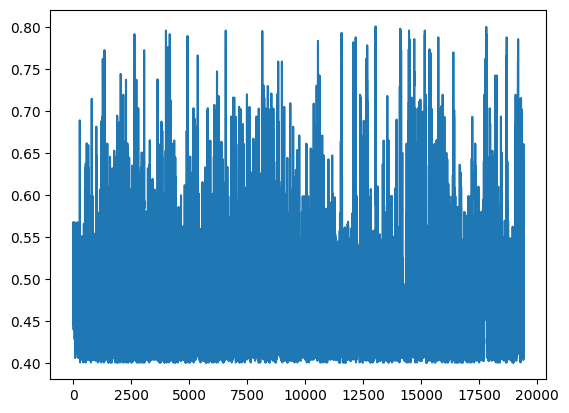

In [31]:
plt.plot(np.abs(forr2.score_samples(np.array(data_binr).reshape(-1, 1))))

In [28]:
print(np.abs(forr2.score_samples(np.array(data_binr).reshape(-1, 1))).argsort()[-12:][::-1]/(6*60))
print(np.array(power_smooth(lof(np.array(data_binr), 50), 240)).argsort()[-12:][::-1]/(6*60))
print(np.array(lof(np.array(data_binr), 50)).argsort()[-12:][::-1]/(6*60))
print(np.array(eval_linreg(data_binr, 15, linreg_bin)).argsort()[-12:][::-1]/(6*60))
print(len(data_binr)/(6*60))

NameError: name 'forr2' is not defined

In [29]:
from time_series.smoothening_functions import derivative
d_data_binr = derivative(derivative(data_binr))
print(np.array(lof(np.array(d_data_binr), 100)).argsort()[-12:][::-1]/(6*60))

d_data_rmsr = derivative(derivative(data_rmsr))
print(np.array(lof(np.array(d_data_rmsr), 100)).argsort()[-12:][::-1]/(6*60))

[31.60833333 37.74722222  3.08888889  9.08888889 32.31388889 21.73888889
 13.31111111 29.76944444 47.13333333  5.35555556 46.47777778 25.09444444]
[ 3.76388889 17.22777778  5.69166667 11.33888889  2.225       5.69444444
 17.225       7.33888889 17.375       3.76666667 21.94444444  5.68888889]


In [30]:
d_linreg_rms = [derivative(derivative(i)) for i in data_rms]
d_linreg_bin = [derivative(derivative(i)) for i in data_bin]

In [35]:
d_linreg_rms = polyreg_outliar_mse(d_linreg_rms, 15)
d_linreg_bin = polyreg_outliar_mse(d_linreg_bin, 15)

In [36]:
print(np.array(eval_linreg(d_data_binr, 15, d_linreg_bin)).argsort()[-12:][::-1]/(6*60))
print(np.array(eval_linreg(d_data_rmsr, 15, d_linreg_rms)).argsort()[-12:][::-1]/(6*60))


[ 7.29722222 35.15        8.46388889 42.60555556 32.10277778  3.51388889
 36.14444444 21.05833333 17.18333333 36.14722222 53.55277778  3.71944444]
[ 7.29722222  5.64722222 17.18333333 17.36666667  1.58888889 31.05
  3.72222222 50.64444444  6.59722222  3.71944444  3.51388889  6.66944444]


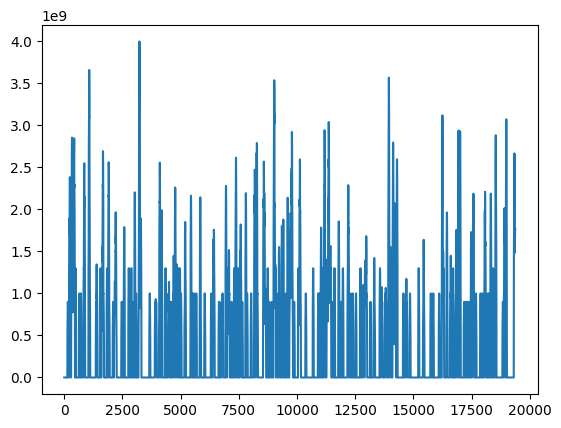

In [31]:
plt.plot(kaiser_wind(lof(np.array(d_data_binr), 100), 45,2))

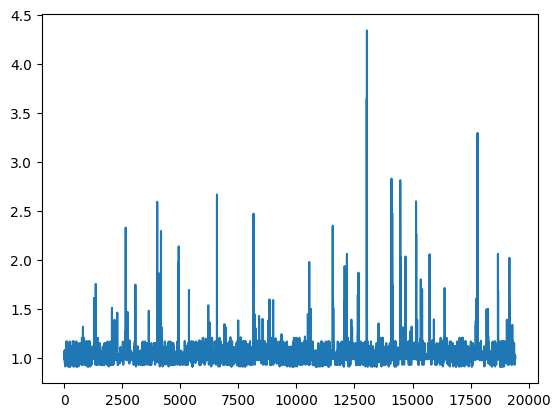

In [32]:

plt.plot(lof(np.array(data_binr), 360))

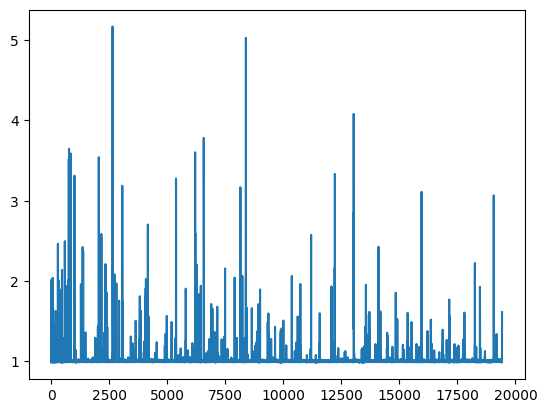

In [33]:
plt.plot(lof(np.array(data_rmsr), 360))

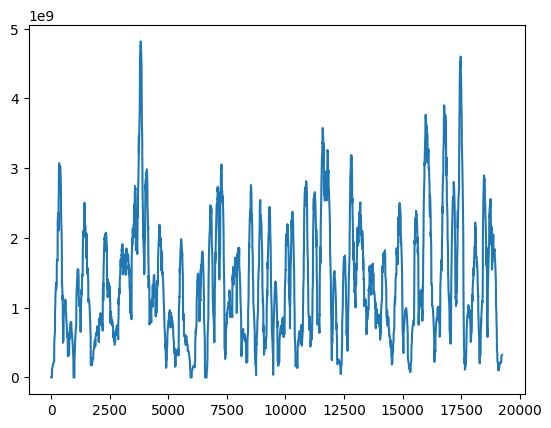

In [34]:
plt.plot(kaiser_wind(lof(np.array(data_binr), 180),180,2))

In [17]:

def SWIDE_ours(signal, thr):
    signal = np.array(signal)
    anchor = 0
    diff_mean = 0
    segms = []
    diffs = np.abs(np.array(derivative(signal)))
    print(len(diffs))
    print(thr)
    i = 0
    while i < len(signal):
        
        
        end = 90
        diff_mean = np.mean(signal[i:i+end])
        flg = False
        while i + end  < len(signal) and diff_mean >thr :
            # print(diff_mean)
            flg = True
            
            end+=1
            diff_mean = np.mean(signal[i:i+end])
        if flg:
            segms.append([i,np.mean(np.array(signal[i:i+end])), np.max(np.array(signal[i:i+end])),i+end])
            i = i+end
        i+=1
    return segms

In [35]:
def get_anomls(arr, signal, thr):
    segms = []
    
    
    print(thr)
    i = 0
    while i < len(arr):
        if arr[i] == 0:
            i+=1
            continue
        start = i
        while i < len(arr) and arr[i]==1:
            i+=1
        
        
        
        segms.append([start, np.max(np.array(signal[i-180:i+180])), i])
        i+=1
    return segms

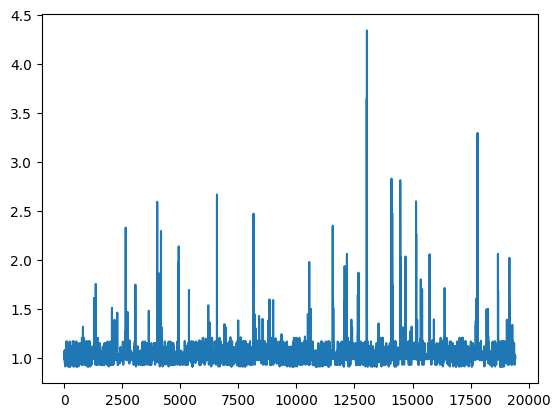

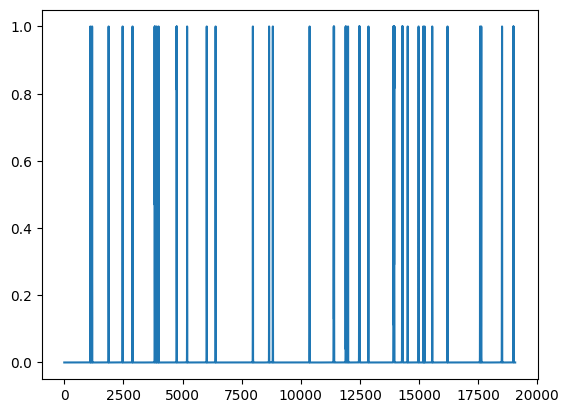

0.5
9533
2.563888888888889 2.563888888888889 1.3136106625243937
2.566666666666667 2.566666666666667 1.3136106625243937
2.5694444444444446 2.5694444444444446 1.3136106625243937
2.5722222222222224 2.5722222222222224 1.3136106625243937
2.575 2.575 1.3136106625243937
2.577777777777778 2.577777777777778 1.3136106625243937
2.5805555555555557 2.5805555555555557 1.3136106625243937
2.5833333333333335 2.5833333333333335 1.3136106625243937
2.5861111111111112 2.5861111111111112 1.3136106625243937
2.588888888888889 2.588888888888889 1.3136106625243937
2.591666666666667 2.591666666666667 1.3136106625243937
2.5944444444444446 2.5944444444444446 1.3136106625243937
2.5972222222222223 2.5972222222222223 1.3136106625243937
2.6 2.6 1.3136106625243937
2.602777777777778 2.602777777777778 1.3136106625243937
2.6055555555555556 2.6055555555555556 1.3136106625243937
2.6083333333333334 2.6083333333333334 1.3136106625243937
2.611111111111111 2.611111111111111 1.3136106625243937
2.613888888888889 2.613888888888889

In [36]:
# segms = SWIDE_ours(kaiser_wind(lof(np.array(data_binr), 360),180,4), 5)
interm = np.array(data_binr)
r = 360
interm  = lof(interm, r )
signal  = interm

plt.plot(interm)
plt.show()
interm = interm > 1.5 + 0
interm  = power_smooth(interm, r )
interm[interm>1] = 1
plt.plot(interm)
plt.show()
segms = get_anomls(interm, signal, 0.5)
print(len(segms))
# segm_means = [np.mean(np.array(i)) for i in segms]
# print(segm_means)
for s in segms:
    # s[0]-=r/2
    # s[-1]+=180
    print(s[0]/360, s[-1]/360, s[1])
segms.sort(key=lambda x: x[1])
print("============")
for s in segms:
    # s[0]-=180
    # s[-1]+=180
    print(s[0]/360, s[-1]/360, s[1])

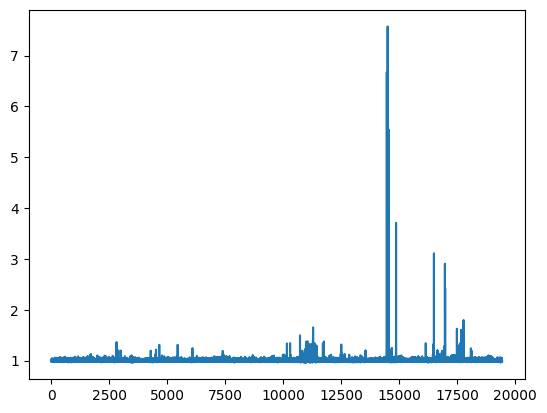

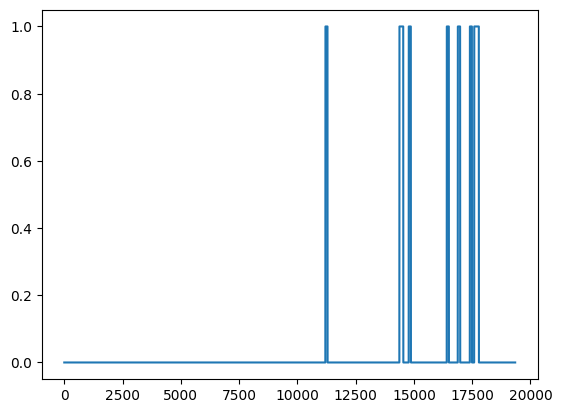

0.5
7
30.988888888888887 31.369444444444444 1.654064684367722
39.80833333333333 40.394444444444446 7.570982899050469
40.919444444444444 41.3 3.7081764766070306
45.452777777777776 45.827777777777776 3.11024894164525
46.766666666666666 47.172222222222224 2.9066634676823195
48.202777777777776 48.577777777777776 1.6266955965873504
48.72222222222222 49.40277777777778 1.7913053906399137
48.202777777777776 48.577777777777776 1.6266955965873504
30.988888888888887 31.369444444444444 1.654064684367722
48.72222222222222 49.40277777777778 1.7913053906399137
46.766666666666666 47.172222222222224 2.9066634676823195
45.452777777777776 45.827777777777776 3.11024894164525
40.919444444444444 41.3 3.7081764766070306
39.80833333333333 40.394444444444446 7.570982899050469


In [69]:
# segms = SWIDE_ours(kaiser_wind(lof(np.array(data_binr), 360),180,4), 5)
interm = np.array(singl_frm)
r = 90
interm  = lof(interm, r )
signal  = interm

plt.plot(interm)
plt.show()
interm = interm > 1.5 + 0
interm  = power_smooth(interm, r )
interm[interm>1] = 1
plt.plot(interm)
plt.show()
segms = get_anomls(interm, signal, 0.5)
print(len(segms))
# segm_means = [np.mean(np.array(i)) for i in segms]
# print(segm_means)
for s in segms:
    s[0]-=r/2
    # s[-1]+=180
    print(s[0]/360, s[-1]/360, s[1])
segms.sort(key=lambda x: x[1])
print("============")
for s in segms:
    # s[0]-=180
    # s[-1]+=180
    print(s[0]/360, s[-1]/360, s[1])

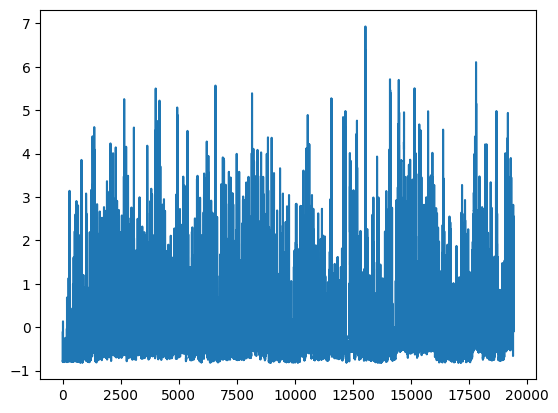

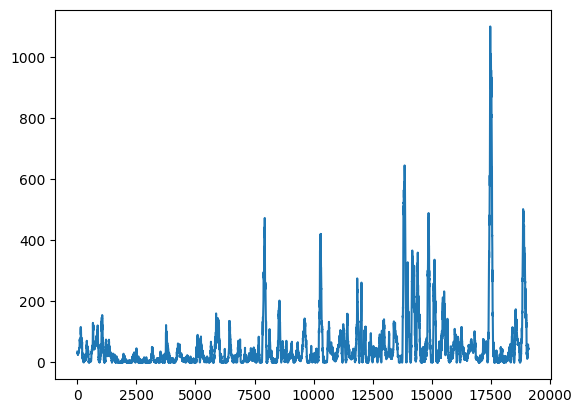

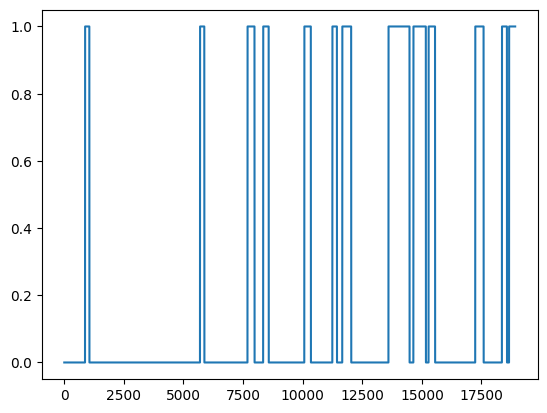

0.5
13
3.058333333333333 3.561111111111111 1.0831157730106997
16.45277777777778 16.955555555555556 1.0646007383973435
21.98611111111111 22.802777777777777 1.0626250529143586
23.81111111111111 24.455555555555556 1.1091155765525107
28.605555555555554 29.366666666666667 1.3451392323907676
31.872222222222224 32.40555555555556 1.3403013863477378
33.02777777777778 34.06666666666667 1.1169957504539298
38.41111111111111 40.86388888888889 7.570982899050469
41.31388888888889 42.766666666666666 1.1037859329408375
43.083333333333336 43.83888888888889 1.072888631753311
48.519444444444446 49.49444444444445 1.6266955965873504
51.63055555555555 52.21388888888889 1.0698485476408703
52.46111111111111 53.17777777777778 1.1035967228346462
21.98611111111111 22.802777777777777 1.0626250529143586
16.45277777777778 16.955555555555556 1.0646007383973435
51.63055555555555 52.21388888888889 1.0698485476408703
43.083333333333336 43.83888888888889 1.072888631753311
3.058333333333333 3.561111111111111 1.08311577301

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
d_interm = sc.fit_transform(X  =np.array(data_binr).reshape(-1,1), y = None)
# d_interm = np.log(np.array(data_binr))
# d_interm = data_binr
plt.plot(d_interm)
plt.show()
unsup_linreg = polyreg_outliar_mse([d_interm.reshape(-1,)],150)
interm = eval_linreg(kaiser_wind(d_interm.reshape(-1,), 180, 2), 150, unsup_linreg)
plt.plot(interm)
plt.show()
interm = interm >  150 + 0
interm  = power_smooth(interm, 180 )
interm[interm>1] = 1
plt.plot(interm)
plt.show()
segms = get_anomls(interm, signal, 0.5)
print(len(segms))
# segm_means = [np.mean(np.array(i)) for i in segms]
# print(segm_means)
for s in segms:
    # s[0]-=r/2
    s[0]+=230
    s[-1]+=230
    print(s[0]/360, s[-1]/360, s[1])
segms.sort(key=lambda x: x[1])
print("============")
for s in segms:
    # s[0]-=180
    # s[-1]+=180
    print(s[0]/360, s[-1]/360, s[1])

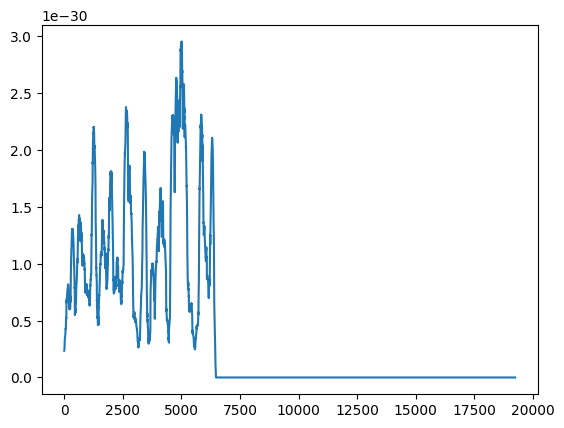

19242
1.5343788970595677e-30
7
3.1777777777777776 3.938888888888889 1.5313360669015487e-30 2.2025372620513448e-30 1144 1418
5.252777777777778 5.813888888888889 1.533781034649329e-30 1.8148819255152687e-30 1891 2093
6.980555555555555 8.358333333333333 1.5323877467603183e-30 2.3773783755013578e-30 2513 3009
9.227777777777778 9.813888888888888 1.5331683480957613e-30 1.985481087738056e-30 3322 3533
11.230555555555556 11.488888888888889 1.5335745137338903e-30 1.6668632506234043e-30 4043 4136
12.511111111111111 17.055555555555557 1.534250103318498e-30 2.9540594440595922e-30 4504 6140
17.25 17.825 1.5293540201961895e-30 2.1083735272992275e-30 6210 6417


In [187]:
intrm = kaiser_wind(res, 180, 2)
plt.plot(intrm)
plt.show()

segms = SWIDE_ours(intrm, np.median(intrm[intrm>0])*1.5)
print(len(segms))
# segm_means = [np.mean(np.array(i)) for i in segms]
# print(segm_means)
for s in segms:
    print(s[0]/360, s[-1]/360, s[1], s[2], s[0],s[-1])

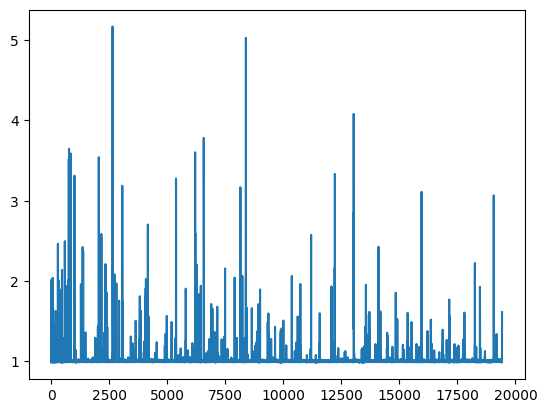

19421
1.0704320167929167
11
0.0 1.961111111111111 1.0704301238939726 0 706 2.4958498963267637
1.9638888888888888 4.15 1.070407313567683 707 1494 3.6467066437489972
5.4527777777777775 5.7972222222222225 1.0701500373684985 1963 2087 3.542662038244511
7.102777777777778 7.563888888888889 1.0701272252517438 2557 2723 5.170928283374102
14.7 14.994444444444444 1.0701634515630003 5292 5398 3.2768721456802794
17.116666666666667 17.644444444444446 1.0701120257877568 6162 6352 3.6030833205676065
18.030555555555555 18.316666666666666 1.070209107601556 6491 6594 3.7829095349810604
22.413888888888888 22.666666666666668 1.070423554382454 8069 8160 3.1669588710171803
23.052777777777777 23.52777777777778 1.070065177039982 8299 8470 5.029382439625817
35.952777777777776 36.55833333333333 1.0702553504556143 12943 13161 4.08112110509155
38.955555555555556 39.486111111111114 1.0704203378128008 14024 14215 2.426148604989392


In [184]:
interm = np.array(data_rmsr)
interm  = lof(interm, 360)
plt.plot(interm)
plt.show()
# interm  =kaiser_wind(interm, 10, 5)
# plt.plot(interm)
# plt.show()
segms = SWIDE_ours(interm, np.mean(interm)*1.05)
print(len(segms))
# segm_means = [np.mean(np.array(i)) for i in segms]
# print(segm_means)
for s in segms:
    print(s[0]/360, s[-1]/360, s[1], s[0],s[-1], s[2])

53.93333333333333


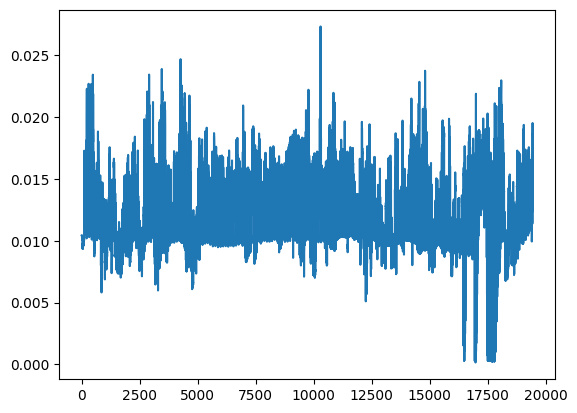

19433
0.016324431718492915
14
0.4777777777777778 1.5777777777777777 0.016320169950374448 0.023436011746525764 172 568
7.638888888888889 7.916666666666667 0.016310810847207903 0.02207588031888008 2750 2850
9.472222222222221 9.744444444444444 0.016319215829883302 0.02389739267528057 3410 3508
11.613888888888889 12.466666666666667 0.016306665895888976 0.024690836668014526 4181 4488
20.308333333333334 20.566666666666666 0.01631587302131999 0.01926313526928425 7311 7404
22.730555555555554 22.991666666666667 0.0163161630167606 0.017651397734880447 8183 8277
26.872222222222224 27.28611111111111 0.016317564150281 0.022219005972146988 9674 9823
29.433333333333334 29.694444444444443 0.01631734113981749 0.01937299221754074 10596 10690
29.84722222222222 30.511111111111113 0.016324394347465687 0.021971922367811203 10745 10984
39.99166666666667 40.266666666666666 0.01628437822665831 0.018625088036060333 14397 14496
40.669444444444444 41.53611111111111 0.016318949411073938 0.023755906149744987 14641 

In [232]:


linreg_new = polyreg_outliar_mse([singl_frm], 18)

intrm = eval_linreg(singl_frm, 18, linreg_new)
print(len(intrm)/360)
intrm  = singl_frm
plt.plot(intrm)
plt.show()

segms = SWIDE_ours(intrm, np.mean(intrm[intrm>0])*1.25)
print(len(segms))
# segm_means = [np.mean(np.array(i)) for i in segms]
# print(segm_means)
for s in segms:
    print(s[0]/360, s[-1]/360, s[1], s[2], s[0],s[-1])